In [1]:
import pandas as pd

In [2]:
import sqlite3

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
con = sqlite3.connect('/content/drive/MyDrive/School21/d12/data/checking-logs.sqlite')

In [5]:
commits = pd.read_sql('''select timestamp from checker where status = 'ready' and uid like 'user_%' ''', con)

In [6]:
commits['timestamp'] = commits['timestamp'].astype('datetime64[ns]')

In [7]:
commits['times'] =pd.cut(commits.timestamp.dt.hour, bins = [0,4, 10, 17, 24], labels=['ночь','утро','день','вечер'], right=False)

In [8]:
commits

,timestamp,times
0,2020-04-17 05:19:02.744528,утро
1,2020-04-17 05:22:45.549397,утро
2,2020-04-17 05:34:24.422370,утро
3,2020-04-17 05:43:27.773992,утро
4,2020-04-17 05:46:32.275104,утро
...,...,...
1681,2020-05-21 20:01:48.959966,вечер
1682,2020-05-21 20:18:54.487900,вечер
1683,2020-05-21 20:19:06.872761,вечер
1684,2020-05-21 20:22:41.877806,вечер


In [9]:
com_gr = commits.groupby([ commits['timestamp'].dt.date, 'times']).count()

In [10]:
com_gr

timestamp
timestamp  times           
2020-04-17 ночь           0
           утро           7
           день           6
           вечер          0
2020-04-18 ночь           0
...                     ...
2020-05-20 вечер          6
2020-05-21 ночь           0
           утро           1
           день          15
           вечер         11

[140 rows x 1 columns]

In [11]:
com_gr = com_gr.unstack(-1)

In [12]:
com_gr.shape

(35, 4)

Text(0.5, 0, 'date')

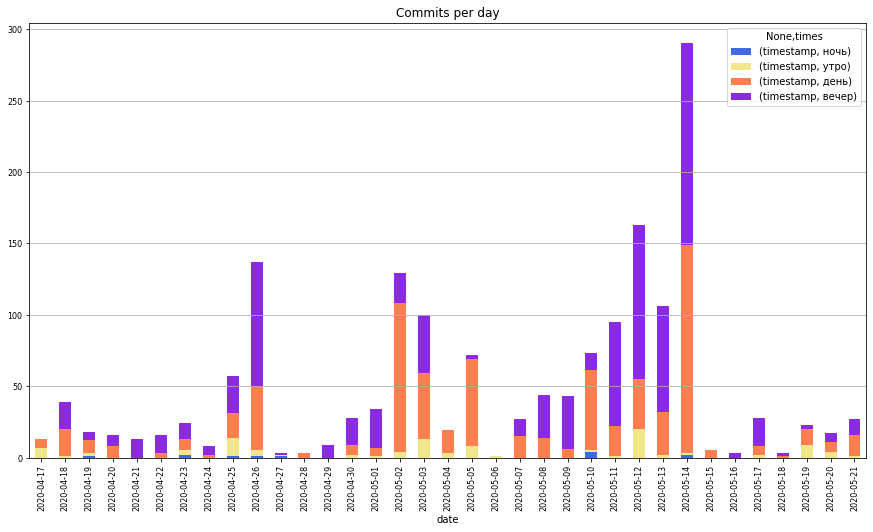

In [13]:
plt = com_gr.plot(kind = 'bar', stacked = True, figsize = (15,8), fontsize = 8 , title = 'Commits per day', color = ['#4169E1', '#F0E68C','#FF7F50','#8A2BE2'])
plt.grid(axis='y')
plt.set_xlabel('date')

In [14]:
con.close()

«Когда пользователи обычно выполняют лабораторные задания: ночью, утром, днем или вечером?». Ответ — два наиболее распространенных периода времени.


День, вечер

«В какой день имеется наибольшее количество коммитов и одновременно с этим количество коммитов вечером выше, чем днем?» Ответ — дата этого дня.

2020-05-12